# **Credit score classification**

Исходный датасет взят [отсюда](https://www.kaggle.com/datasets/parisrohan/credit-score-classification)



# Импорт необходимых библиотек для работы с данными, визуализации и статистического анализа. 



Распакуем архив с уже готовыми моделями, чтобы не обучать их

In [3]:
! tar -xzf data/models.tar.gz -C ./data

In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
from scipy.stats.mstats import winsorize 
import calendar 
sns.set()
pd.set_option("display.max_columns", None) 
%matplotlib inline
sns.set_color_codes("pastel")

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
from plotly.offline import iplot

from scipy import stats

# Импорт модулей, необходимых для работы с файловой системой Google Colab и файлами на Google Drive.

In [ ]:
# from google.colab import files, drive 
from pathlib import Path 

# подключение Google Drive к текущей сессии Google Colab.

# drive.mount('/content/gdrive') 
# ROOT_DIR = Path('gdrive/MyDrive/ML_team') 
ROOT_DIR = Path('./data/') 

SRC_DATASET = ROOT_DIR / 'train.csv'
CLEAR_DATASET = ROOT_DIR / 'clear_train.csv' 
MODELS_DIR = ROOT_DIR / 'models' 

# Создание директорий ROOT_DIR и MODELS_DIR на Google Drive, если они еще не созданы.
ROOT_DIR.mkdir(exist_ok=True)
MODELS_DIR.mkdir(exist_ok=True)

# Загрузка файла с данными SRC_DATASET на Google Drive, в случае его отсутствия.
# if not SRC_DATASET.is_file():
#   files.upload_file(str(SRC_DATASET))

# Загрузка данных из файла и создание DataFrame.

In [3]:
df = pd.read_csv(SRC_DATASET) 
df.head() # вывод первых 5 строк DataFrame.


<ipython-input-3-bb6c30ed32cb>:1: DtypeWarning:

Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.



,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# Статистическое описание DataFrame

In [4]:
df.describe(include="all") # вывод статистического описания DataFrame - информация обо всех колонках, в том числе и категориальных.


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,100000.00000,100000.000000,100000,88592,100000.000000,92998,100000,98035.000000,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,NaN,NaN,434,6260,NaN,749,4384,NaN,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x1602,CUS_0xd40,January,Langep,38,#F%$D@*&8,_______,36585.12,NaN,NaN,NaN,NaN,3,Not Specified,NaN,19,_,NaN,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,NaN,NaN,14386,1408,NaN,5327,2091,NaN,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,22.47443,72.466040,NaN,NaN,21.068780,NaN,NaN,27.754251,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,129.05741,466.422621,NaN,NaN,14.860104,NaN,NaN,193.177339,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,0.00000,1.000000,NaN,NaN,-5.000000,NaN,NaN,0.000000,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,4.00000,8.000000,NaN,NaN,10.000000,NaN,NaN,3.000000,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,5.00000,13.000000,NaN,NaN,18.000000,NaN,NaN,6.000000,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,7.00000,20.000000,NaN,NaN,28.000000,NaN,NaN,9.000000,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


Выводим общую информацию о DataFrame

In [5]:
df.info() 
df.isnull().sum() # проверка DataFrame на наличие пропущенных значений.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Как можно видеть, многие столбцы несоответствуют своему типу, к примеру Age явно должен быть числовым. 

Визуализация пропусков


In [26]:

# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().mean().sort_values() * 100

# Create a bar plot using Plotly
fig = go.Figure()

# Create a trace for non-null values
fig.add_trace(go.Bar(
    name='Не пустые',
    y=missing_percentage.index,
    x=(100 - missing_percentage.values),
    # text=(100 - missing_percentage.values).round(2),
    # textposition='inside',
    # texttemplate='%{text}%',
    orientation='h'
))

# Create a trace for missing values
fig.add_trace(go.Bar(
    name='Пропуски',
    y=missing_percentage.index,
    x=missing_percentage.values,
    text=missing_percentage.values.round(2),
    textposition='outside',
    texttemplate='%{text}%',
    orientation='h'
))


# Set plot title and axis labels
fig.update_layout(
    title='Пропуски в данных',
    showlegend=False
)
fig.update_layout(barmode='stack',paper_bgcolor='rgb(255, 255, 255)', plot_bgcolor='rgb(255, 255, 255)')
fig.update_layout(height=800)

# Show the figure
fig.show()

# Исправляем типы столбцов на необходимые

Вспомогательные функции для изменения типа данных

In [ ]:
# Преобразование строковых значений в количество месяцев
def cha_to_mouths_count(cha: str):
    if not isinstance(cha, str):
        return np.nan
    digits = [int(w) for w in cha.split() if str(w).isdigit()]
    return digits[0] * 12 + digits[1]

# Заполнение пропущенных значений в группированных данных по методу (median, mean и т.д.)
def fillna_groupby(
    df: pd.DataFrame,
    groupby: str,
    value_collums,
    method: str = "median",
    round: int = 2,
):
    return df[value_collums].fillna(
        df.groupby(groupby)[value_collums].transform(method).round(round)
    )

# Замена подстроки, если значение является строкой
def replace_if_str(df: pd.DataFrame, value_collums, old: str, new: str):
    return df[value_collums].apply(
        lambda x: x.replace(old, new) if isinstance(x, str) else x
    )

# Функция обрезки больших чисел, представленных строкой или числом, с настройкой максимального и минимального значения.
def large_numbers_clip(max_value: int = 100_000, min_value: int = 0):
    max_value_len = len(str(max_value))
    min_value_len = len(str(min_value))

    def clip(x):
        if isinstance(x, str):
            if not x.replace(".", "").isdigit():
                return np.nan
            p = x.split(".")
            if len(p[0]) > max_value_len or len(p[0]) < min_value_len:
                return np.nan
            return float(x)
        elif x == np.nan:
            return x
        else:
            if x > max_value or x < min_value:
                return np.nan
            return x

    return clip

# Заполнение пропущенных значений в группированных данных значениями из соседних строк в этой группе
def fillna_neighbors_groupby(df: pd.DataFrame, groupby, value_collums):
    return (
        df.groupby(groupby, sort=False, group_keys=True)[value_collums]
        .apply(lambda x: x.ffill().bfill())
        .reset_index()[value_collums]
    )

# Группируем по Customer_ID, т.к. записей об одном клиенте может быть несколько
G = "Customer_ID"

Исправляем типы столбцов для возможности отображения выбросов

In [ ]:
df["Credit_History_Age"] = df["Credit_History_Age"].apply(cha_to_mouths_count) #преобразование строк в числовое значение
df["Num_of_Delayed_Payment"] = pd.to_numeric(replace_if_str(df, "Num_of_Delayed_Payment", "_", "0")) # заменяем пропуски на 0 
df["Changed_Credit_Limit"] = pd.to_numeric(replace_if_str(df, "Changed_Credit_Limit", "_", "0")) 
# df["Type_of_Loan"]
df["Annual_Income"] = pd.to_numeric(replace_if_str(df, "Annual_Income", "_", " ")) # избавляемся от _ в данных
# df["Num_Credit_Inquiries"]
df["Age"] = pd.to_numeric(replace_if_str(df, "Age", "_", "")) 
# df["Num_Bank_Accounts"]
# df["Num_Credit_Card"]
df["Num_of_Loan"] = pd.to_numeric(replace_if_str(df, "Num_of_Loan", "_", ""))
df["Num_of_Delayed_Payment"] = pd.to_numeric(replace_if_str(df, "Num_of_Delayed_Payment", "_", ""))
df["Num_Credit_Inquiries"] = pd.to_numeric(replace_if_str(df, "Num_Credit_Inquiries", "_", ""))
df["Outstanding_Debt"] = pd.to_numeric(replace_if_str(df, "Outstanding_Debt", "_", ""))
df["Credit_Utilization_Ratio"] = pd.to_numeric(replace_if_str(df, "Credit_Utilization_Ratio", "_", ""))
df["Total_EMI_per_month"] = pd.to_numeric(replace_if_str(df, "Total_EMI_per_month", "_", ""))
df["Amount_invested_monthly"] = pd.to_numeric(replace_if_str(df, "Amount_invested_monthly", "_", ""))
df["Monthly_Balance"] = replace_if_str(df, "Monthly_Balance", "_", "")
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"].apply(lambda x: str(x)[:8] if len(str(x)) > 8 else x))

Выводим результат изменения типа данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

# Отображаем выбросы 

In [ ]:
numeric_col = df.select_dtypes(exclude='object').columns.to_list()

max_cols = 6
max_rows = (len(numeric_col) + 1) // max_cols

fig = make_subplots(rows=max_rows, cols=max_cols)

row, col = 1, 1
for i, numeric_col in enumerate(numeric_col):

    fig.add_trace(
        go.Box(
            y=df[numeric_col], 
            name=numeric_col, 
            boxpoints='suspectedoutliers', 
            jitter=1),
        row=row, col=col)
    col += 1
    if col > max_cols: 
        col = 1
        row += 1


fig.update_layout(title='', height=1500, showlegend=False)
fig.show()

# Избавляемся от выбросов

In [ ]:
if CLEAR_DATASET.is_file():
    df = pd.read_csv(CLEAR_DATASET) # загружаем данные с диска (если они уже были обработаны)
else:
  df["Credit_History_Age"] = fillna_groupby(df, G, "Credit_History_Age", "mean", 0) # заполняем пропуски средним


  df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].clip(0) # ограничиваем значения снизу (оставляем > 0)
  df["Num_of_Delayed_Payment"] = fillna_neighbors_groupby(df, G, "Num_of_Delayed_Payment") # группируем данные и заполяем соседними
  df["Num_of_Delayed_Payment"] = fillna_groupby(df, G, "Num_of_Delayed_Payment", "median", 0) # заполняем оставшиеся пропуски медианой 


  df["Changed_Credit_Limit"] = df["Changed_Credit_Limit"].clip(0, 100) # оставляем значения от 0 до 100
  df["Changed_Credit_Limit"] = fillna_neighbors_groupby(df, G, "Changed_Credit_Limit")
  df["Changed_Credit_Limit"] = fillna_groupby(df, G, "Changed_Credit_Limit", "median", 0)


  df["Type_of_Loan"] = df["Type_of_Loan"].fillna("_") # заменяем NaN на '_'


  df["Annual_Income"] = df.groupby(G)["Annual_Income"].transform(lambda row: winsorize(row, limits=[0, 0.80])) # значения выше 80 процентиля или ниже 20 процентиля заменяются на ближайшие значения внутри этого интервала.
  df["Monthly_Inhand_Salary"] = df["Monthly_Inhand_Salary"].fillna(df["Annual_Income"] / 12) # заполняем пропуски в месячном доходе используя годовой


  df["Num_Credit_Inquiries"] = fillna_neighbors_groupby(df, G, "Num_Credit_Inquiries")
  df["Num_Credit_Inquiries"] = fillna_groupby(df, G, "Num_Credit_Inquiries", "median", 0)


  df["Age"] = df["Age"].apply(large_numbers_clip(max_value=60, min_value=16)) # вводим ограничения по возрасту - [16,60] (эти значения по квантилю)
  df["Age"] = fillna_neighbors_groupby(df, G, "Age") 
  df["Age"] = fillna_groupby(df, G, "Age", "median", 0)


  df["Num_Bank_Accounts"] = df["Num_Bank_Accounts"].apply(large_numbers_clip(max_value=30, min_value=0))
  df["Num_Bank_Accounts"] = fillna_neighbors_groupby(df, G, "Num_Bank_Accounts")
  df["Num_Bank_Accounts"] = fillna_groupby(df, G, "Num_Bank_Accounts", "median", 0)


  df["Num_Credit_Card"] = df.groupby(G)["Num_Credit_Card"].transform(lambda row: winsorize(row, limits=[0, 0.70]))
  df["Num_Credit_Card"] = fillna_neighbors_groupby(df, G, "Num_Credit_Card")
  df["Num_Credit_Card"] = fillna_groupby(df, G, "Num_Credit_Card", "median", 0)


  df["Num_of_Loan"] = df["Num_of_Loan"].clip(lower=0, upper=20)
  df["Num_of_Loan"] = df.groupby(G)["Num_of_Loan"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Num_of_Loan"] = fillna_neighbors_groupby(df, G, "Num_of_Loan")
  df["Num_of_Loan"] = fillna_groupby(df, G, "Num_of_Loan", "median", 0)

  df["Num_of_Delayed_Payment"] = df["Num_of_Delayed_Payment"].clip(lower=0)
  df["Num_of_Delayed_Payment"] = df.groupby(G)["Num_of_Delayed_Payment"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Num_of_Delayed_Payment"] = fillna_neighbors_groupby(df, G, "Num_of_Delayed_Payment")
  df["Num_of_Delayed_Payment"] = fillna_groupby(df, G, "Num_of_Delayed_Payment", "median", 0)


  df["Num_Credit_Inquiries"] = df["Num_Credit_Inquiries"].clip(lower=0)
  df["Num_Credit_Inquiries"] = df.groupby(G)["Num_Credit_Inquiries"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Num_Credit_Inquiries"] = fillna_neighbors_groupby(df, G, "Num_Credit_Inquiries")
  df["Num_Credit_Inquiries"] = fillna_groupby(df, G, "Num_Credit_Inquiries", "median", 0)


  df["Outstanding_Debt"] = df["Outstanding_Debt"].clip(lower=0)
  df["Outstanding_Debt"] = df.groupby(G)["Outstanding_Debt"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Outstanding_Debt"] = fillna_neighbors_groupby(df, G, "Outstanding_Debt")
  df["Outstanding_Debt"] = fillna_groupby(df, G, "Outstanding_Debt", "median", 4)


  df["Credit_Utilization_Ratio"] = df["Credit_Utilization_Ratio"].clip(lower=0)
  df["Credit_Utilization_Ratio"] = df.groupby(G)["Credit_Utilization_Ratio"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Credit_Utilization_Ratio"] = fillna_neighbors_groupby(df, G, "Credit_Utilization_Ratio")
  df["Credit_Utilization_Ratio"] = fillna_groupby(df, G, "Credit_Utilization_Ratio", "median", 4)


  df["Total_EMI_per_month"] = df["Total_EMI_per_month"].clip(lower=0)
  df["Total_EMI_per_month"] = df.groupby(G)["Total_EMI_per_month"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Total_EMI_per_month"] = fillna_neighbors_groupby(df, G, "Total_EMI_per_month")
  df["Total_EMI_per_month"] = fillna_groupby(df, G, "Total_EMI_per_month", "median", 4)


  df["Amount_invested_monthly"] = df["Amount_invested_monthly"].clip(lower=0)
  df["Amount_invested_monthly"] = df.groupby(G)["Amount_invested_monthly"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Amount_invested_monthly"] = fillna_neighbors_groupby(df, G, "Amount_invested_monthly")
  df["Amount_invested_monthly"] = fillna_groupby(df, G, "Amount_invested_monthly", "median", 2)


  df["Monthly_Balance"] = df["Monthly_Balance"].apply(large_numbers_clip(max_value=1_000_000, min_value=0)) # ограничиваем значения
  df["Monthly_Balance"] = pd.to_numeric(replace_if_str(df, "Monthly_Balance", "_", "")) # убираем "_"
  df["Monthly_Balance"] = df["Monthly_Balance"].clip(lower=0, upper=100_000)
  df["Monthly_Balance"] = df.groupby(G)["Monthly_Balance"].transform(lambda row: winsorize(row, limits=[0, 0.90]))
  df["Monthly_Balance"] = fillna_neighbors_groupby(df, G, "Monthly_Balance")
  df["Monthly_Balance"] = fillna_groupby(df, G, "Monthly_Balance", "median", 2)


  df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(lambda x: np.nan if x == "!@9#%8" else x) # избавляемся от спец. значения "!@9#%8"
  df["Payment_Behaviour"] = fillna_neighbors_groupby(df, G, "Payment_Behaviour") # заполняем соседними значениями


  df["Payment_of_Min_Amount"] = df["Payment_of_Min_Amount"].apply(lambda x: np.nan if x == "NM" else x) # избавляемся от спец. значения "NM"
  df["Payment_of_Min_Amount"] = fillna_neighbors_groupby(df, G, "Payment_of_Min_Amount")

  df.to_csv(CLEAR_DATASET, index=False)

# Показываем, что выбросов больше нет

In [ ]:
numeric_col = df.select_dtypes(exclude='object').columns.to_list()

max_cols = 6
max_rows = (len(numeric_col) + 1) // max_cols

fig = make_subplots(rows=max_rows, cols=max_cols)

row, col = 1, 1
for i, numeric_col in enumerate(numeric_col):

    fig.add_trace(
        go.Box(
            y=df[numeric_col], 
            name=numeric_col, 
            boxpoints='suspectedoutliers', 
            jitter=1),
        row=row, col=col)
    col += 1
    if col > max_cols: 
        col = 1
        row += 1


fig.update_layout(title='', height=1500, showlegend=False)
fig.show()

# Подготавливаем данные для создания на их основе выборки

Выводим общую информацию о DataFrame с уже заполнеными пропусками и исправленными типами столбцов

In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       97688 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

ID                             0
Customer_ID                    0
Month                          0
Name                        9985
Age                         2312
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [ ]:
df.describe(include="all")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,97688.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,100000,12500,8,10139,NaN,12501,16,NaN,NaN,NaN,NaN,NaN,NaN,6261,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,2,NaN,NaN,6,NaN,3
top,0x1602,CUS_0xd40,January,Langep,NaN,#F%$D@*&8,_______,NaN,NaN,NaN,NaN,NaN,NaN,_,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,1,8,12500,44,NaN,5572,7062,NaN,NaN,NaN,NaN,NaN,NaN,11408,NaN,NaN,NaN,NaN,36479,NaN,NaN,NaN,59432,NaN,NaN,27588,NaN,53174
mean,NaN,NaN,NaN,NaN,33.760247,NaN,NaN,50505.123449,4200.046683,5.370500,5.527020,72.466040,2.569520,NaN,21.068780,11.709840,10.209316,4.933440,NaN,1426.220376,25.412068,221.205000,NaN,96.315701,64.503471,NaN,229.471801,NaN
std,NaN,NaN,NaN,NaN,10.480262,NaN,NaN,38299.422093,3188.126588,2.600407,2.067548,466.422621,2.616493,NaN,14.860104,6.170078,6.815193,3.542679,NaN,1155.129026,2.164394,99.678028,NaN,97.000702,48.007734,NaN,117.240772,NaN
min,NaN,NaN,NaN,NaN,16.000000,NaN,NaN,7005.930000,303.645417,0.000000,0.000000,1.000000,0.000000,NaN,-5.000000,0.000000,0.000000,0.000000,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007759,NaN
25%,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,19342.972500,1625.023750,3.000000,4.000000,8.000000,0.000000,NaN,10.000000,7.000000,4.970000,2.000000,NaN,566.072500,23.849441,144.000000,NaN,28.125728,32.524401,NaN,167.020550,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,36999.705000,3095.978333,5.000000,5.000000,13.000000,2.000000,NaN,18.000000,12.000000,9.250000,4.000000,NaN,1166.155000,25.076447,219.000000,NaN,64.016009,51.511546,NaN,226.086100,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,71683.470000,5961.958333,7.000000,7.000000,20.000000,4.000000,NaN,28.000000,17.000000,14.660000,8.000000,NaN,1945.962500,26.639669,302.000000,NaN,138.079727,82.087065,NaN,270.086700,NaN


Удаляем столбцы не несущие полезной информации

In [ ]:
df = df.drop(
    columns=["ID", "Customer_ID", "Month", "Name", "SSN", "Occupation", "Type_of_Loan"]
)


Удаляем оставшиеся пропуски

In [ ]:
df.dropna(inplace=True)

Выводим уникальные значения для каждого столбца типа object

In [ ]:
{col: list(df[col].unique()) for col in df.select_dtypes("object").columns}

{'Credit_Mix': ['_', 'Good', 'Standard', 'Bad'],
 'Payment_of_Min_Amount': ['No', 'Yes'],
 'Payment_Behaviour': ['High_spent_Small_value_payments',
  'Low_spent_Large_value_payments',
  'Low_spent_Medium_value_payments',
  'Low_spent_Small_value_payments',
  'High_spent_Medium_value_payments',
  'High_spent_Large_value_payments'],
 'Credit_Score': ['Good', 'Standard', 'Poor']}

Присваиваем категориальным индексам соответствующие числовые

In [ ]:
# Создаём обратный словарь, для замены категориальных значений
mapper_PB = {
    item: i
    for i, item in enumerate(
        [
            "Low_spent_Small_value_payments",
            "Low_spent_Medium_value_payments",
            "High_spent_Small_value_payments",
            "Low_spent_Large_value_payments",
            "High_spent_Medium_value_payments",
            "High_spent_Large_value_payments",
        ]
    )
}
df["Payment_Behaviour"] = df["Payment_Behaviour"].apply(lambda x: mapper_PB[x])
mapper_PB

{'Low_spent_Small_value_payments': 0,
 'Low_spent_Medium_value_payments': 1,
 'High_spent_Small_value_payments': 2,
 'Low_spent_Large_value_payments': 3,
 'High_spent_Medium_value_payments': 4,
 'High_spent_Large_value_payments': 5}

In [ ]:
mapper_CM = {item: i for i, item in enumerate(["_", "Bad", "Standard", "Good"])}

df["Credit_Mix"] = df["Credit_Mix"].apply(lambda x: mapper_CM[x])
mapper_CM

{'_': 0, 'Bad': 1, 'Standard': 2, 'Good': 3}

In [ ]:
mapper_CS = {item: i for i, item in enumerate(["Poor", "Standard", "Good"])}

df["Credit_Score"] = df[df["Credit_Score"].notna()]["Credit_Score"].apply(
    lambda x: mapper_CS[x]
)
mapper_CS

{'Poor': 0, 'Standard': 1, 'Good': 2}

In [ ]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].apply(lambda x: int(x == 'Yes'))

Выводим обработанные данные

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97688 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       97688 non-null  float64
 1   Annual_Income             97688 non-null  float64
 2   Monthly_Inhand_Salary     97688 non-null  float64
 3   Num_Bank_Accounts         97688 non-null  float64
 4   Num_Credit_Card           97688 non-null  int64  
 5   Interest_Rate             97688 non-null  int64  
 6   Num_of_Loan               97688 non-null  int64  
 7   Delay_from_due_date       97688 non-null  int64  
 8   Num_of_Delayed_Payment    97688 non-null  float64
 9   Changed_Credit_Limit      97688 non-null  float64
 10  Num_Credit_Inquiries      97688 non-null  float64
 11  Credit_Mix                97688 non-null  int64  
 12  Outstanding_Debt          97688 non-null  float64
 13  Credit_Utilization_Ratio  97688 non-null  float64
 14  Credit

Age                         0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [ ]:
df.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.00000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000,97688.000000
mean,33.760247,50805.070272,4224.910011,5.336398,5.501187,72.485116,2.542707,20.881756,11.626075,10.13280,4.860372,1.659365,1409.195172,25.423129,222.781723,0.584719,95.861061,64.804252,2.241504,230.298775,0.895555
std,10.480262,38493.454623,3204.299085,2.604070,2.060758,466.656407,2.599826,14.805192,6.170930,6.79769,3.533599,1.061621,1148.618726,2.169630,99.599291,0.492773,96.809393,48.259844,1.845720,117.793207,0.675900
min,16.000000,7006.035000,303.645417,0.000000,0.000000,1.000000,0.000000,-5.000000,0.000000,0.00000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.007759,0.000000
25%,25.000000,19431.830000,1629.908958,3.000000,4.000000,7.000000,0.000000,10.000000,7.000000,4.92000,2.000000,1.000000,558.810000,23.857133,147.000000,0.000000,27.724981,32.619392,0.000000,167.716600,0.000000
50%,33.000000,37263.450000,3113.508333,5.000000,5.000000,13.000000,2.000000,18.000000,12.000000,9.18000,4.000000,2.000000,1150.030000,25.083734,221.000000,1.000000,63.476129,51.666090,2.000000,226.641900,1.000000
75%,42.000000,72125.200000,5998.616250,7.000000,7.000000,20.000000,4.000000,28.000000,16.000000,14.49000,8.000000,2.000000,1901.820000,26.650316,304.000000,1.000000,137.707742,82.500973,4.000000,270.886100,1.000000
max,56.000000,179987.280000,15204.633333,30.000000,11.000000,5797.000000,9.000000,67.000000,25.000000,36.97000,15.000000,3.000000,4998.070000,38.112157,404.000000,1.000000,1042.674209,510.726237,5.000000,1183.930000,2.000000


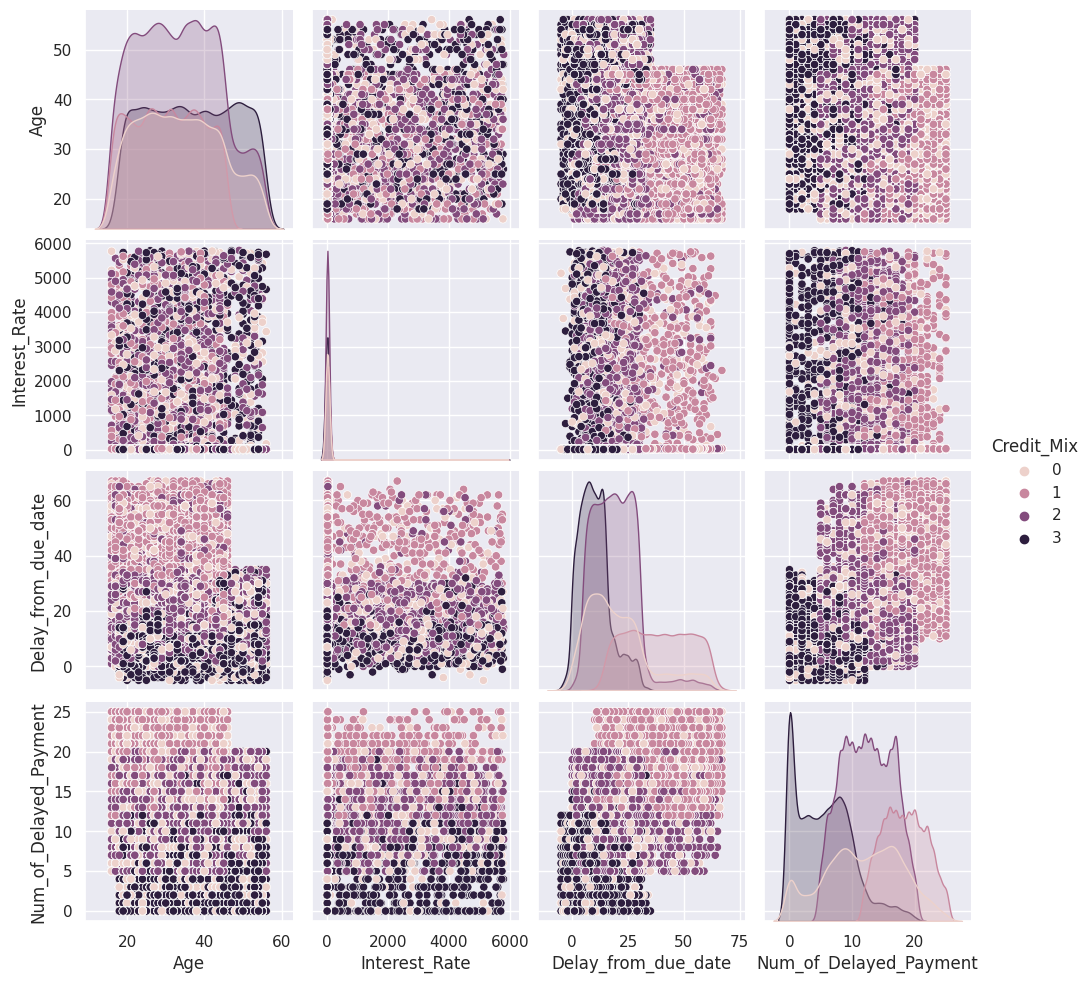

In [ ]:
to_plot = ["Age", "Interest_Rate", "Delay_from_due_date", "Num_of_Delayed_Payment", "Credit_Mix"]
sns.pairplot(df[to_plot], hue="Credit_Mix")
plt.show()

In [ ]:
import plotly.express as px

z = df.corr()

fig = px.imshow(z.round(2), text_auto=True)
fig.update_layout(
    #yaxis=dict(showticklabels=False),
    #xaxis=dict(showticklabels=False),
    width=800,
    height=800
)
fig.show()


Избавляемя от месячного дохода, так как он полностью коррелирует с годовым

In [ ]:
df = df.drop(columns=['Monthly_Inhand_Salary'])

# Нормализация данных

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle

Нормализуем данные, чтобы каждый признак имел одинаковый диапазон значений.

 Это может улучшить работу некоторых алгоритмов машинного обучения, таких как градиентный спуск или метод ближайших соседей, которые могут быть чувствительны к масштабированию признаков.

In [ ]:
to_train = df[df['Credit_Score'].notna()]
Y = to_train['Credit_Score'].copy()
X = to_train.drop(columns=['Credit_Score']).copy()

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X.describe(include = 'all')

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
count,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04,9.768800e+04
mean,2.921075e-16,-6.517139e-17,-4.160495e-17,4.800571e-17,2.705777e-17,-2.378465e-17,-8.408273e-17,1.092494e-16,-3.776449e-16,7.884575e-17,7.768197e-17,1.844583e-16,1.395802e-15,-2.982173e-17,6.248016e-17,-1.291790e-16,-2.473022e-17,-2.531210e-17,3.148011e-16
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-1.694646e+00,-1.137837e+00,-2.049263e+00,-2.669510e+00,-1.531865e-01,-9.780348e-01,-1.748163e+00,-1.884017e+00,-1.490632e+00,-1.375480e+00,-1.563056e+00,-1.226667e+00,-2.499577e+00,-2.226751e+00,-1.186594e+00,-9.902092e-01,-1.342826e+00,-1.214440e+00,-1.955055e+00
25%,-8.358848e-01,-8.150321e-01,-8.972145e-01,-7.284673e-01,-1.403291e-01,-9.780348e-01,-7.349997e-01,-7.496599e-01,-7.668526e-01,-8.094824e-01,-6.210955e-01,-7.403584e-01,-7.217842e-01,-7.608700e-01,-1.186594e+00,-7.038204e-01,-6.669111e-01,-1.214440e+00,-5.312912e-01
50%,-7.254120e-02,-3.517920e-01,-1.291821e-01,-2.432066e-01,-1.274716e-01,-2.087486e-01,-1.946460e-01,6.059493e-02,-1.401659e-01,-2.434844e-01,3.208653e-01,-2.256332e-01,-1.564309e-01,-1.788901e-02,8.427479e-01,-3.345243e-01,-2.722394e-01,-1.308459e-01,-3.104503e-02
75%,7.862203e-01,5.538666e-01,6.388503e-01,7.273148e-01,-1.124712e-01,5.605375e-01,4.807962e-01,7.087988e-01,6.409857e-01,8.885117e-01,3.208653e-01,4.288867e-01,5.656234e-01,8.154545e-01,8.427479e-01,4.322607e-01,3.666985e-01,9.527479e-01,3.445660e-01
max,2.122072e+00,3.355970e+00,9.471223e+00,2.668358e+00,1.226715e+01,2.483753e+00,3.115021e+00,2.167258e+00,3.948008e+00,2.869505e+00,1.262826e+00,3.124530e+00,5.848506e+00,1.819483e+00,8.427479e-01,9.780229e+00,9.240069e+00,1.494545e+00,8.095850e+00


# Модельки!

In [ ]:
assert False # Лишний раз не трогаем модели, для обновления только графиков

Разделяем исходный датасет на обучающую (train) и тестовую (test) выборки в соотношении 70/30 соответственно.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=42, stratify=Y)


Вспомогательные функции для работы с моделями

In [ ]:
# Получение названия модели из ее экземпляра
def model_name(model): 
  return type(model).__name__

# Загрузка объекта в формате pickle
def load_obj(path):
  if not path.is_file(): 
    return None
  with path.open('rb') as f:
    return pickle.load(f) 

# Сохранение объекта в формате pickle
def save_obj(obj, path):
  with path.open('wb') as f:
    pickle.dump(obj, f)

# Вывод точности модели
def model_stats(model, m_name=None):
  if m_name is None:
    m_name = model_name(model)
  print(f"\n### Model '{m_name}':")
  print(f"Score: {model.score(X_test, Y_test) * 100:.4f}%")

# Вывод признаков в порядке убывания их важности
def model_feature_importance(model, feature_list, percent_multiply=100):
  importances = list(model.feature_importances_)
  feature_importances = sorted(zip(feature_list, importances), key = lambda x: x[1], reverse = True)
  for feature, importance in feature_importances:
    print(f"Feature: {feature:25} Importance: {importance*percent_multiply:.4f}%")


Устанавливаем optuna

In [ ]:
!pip install optuna
import optuna
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances

# optuna.logging.set_verbosity(optuna.logging.WARNING)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# DecisionTreeClassifier



Алгоритм строит дерево решений на основе обучающих данных и принимает решения о классификации или регрессии на основе того, какие признаки находятся в узлах дерева.

 Каждый узел в дереве соответствует определенному признаку, а каждое ребро - значению этого признака.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_dir = MODELS_DIR / 'dt'
model_dir.mkdir(exist_ok=True, parents=True)
model_class = DecisionTreeClassifier

In [ ]:
# Сначала обучаем модель со стандартными параметрами
model_path = model_dir / 'default.pkl'

# Пытаемся прочитать модель с Гуглдиска (чтобы не обучать её по-новой)
model = load_obj(model_path)
if model is None:
  model = model_class()
  model.fit(X_train, Y_train)
  save_obj(model, model_path)

# Выводим результаты
model_stats(model)
model_feature_importance(model, X_train.columns.to_list())


### Model 'DecisionTreeClassifier':
Score: 73.8049%
Feature: Outstanding_Debt          Importance: 16.4044%
Feature: Credit_History_Age        Importance: 14.3841%
Feature: Credit_Mix                Importance: 10.6871%
Feature: Changed_Credit_Limit      Importance: 6.2459%
Feature: Delay_from_due_date       Importance: 5.8012%
Feature: Payment_Behaviour         Importance: 4.5977%
Feature: Age                       Importance: 4.5684%
Feature: Interest_Rate             Importance: 4.4346%
Feature: Num_Credit_Inquiries      Importance: 4.2065%
Feature: Credit_Utilization_Ratio  Importance: 4.1375%
Feature: Amount_invested_monthly   Importance: 3.9830%
Feature: Annual_Income             Importance: 3.7256%
Feature: Monthly_Balance           Importance: 3.5851%
Feature: Num_Credit_Card           Importance: 3.1507%
Feature: Num_of_Delayed_Payment    Importance: 3.0067%
Feature: Total_EMI_per_month       Importance: 2.8311%
Feature: Num_Bank_Accounts         Importance: 1.9549%
Feature: 

Подбираем гиперпараметры (тюним) для улучшения качества модели

In [ ]:
model_path = model_dir / 'tuned.pkl'
study_path = model_dir / 'study.pkl'

def objective(trial):
  param = {
      'max_depth': trial.suggest_int('max_depth', 10, 100),
      'criterion': trial.suggest_categorical('criterion', ['gini', 'entropy']),
      'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20)
  }
  model = model_class(**param)
  model.fit(X_train, Y_train)
  return model.score(X_test, Y_test)

# Пытаемся прочитать данные тюнинга с Гуглдиска
study = load_obj(study_path)
if study is None:
  study = optuna.create_study(
    direction='maximize', # оптимизируем гиперпараметры максимизацией значения метрики
    sampler=optuna.samplers.TPESampler(seed=42), # семплер для обхода по параметрам
    pruner=optuna.pruners.MedianPruner( # прунер для прерывания испытания
        n_warmup_steps=10 # отключаем прунер пока не превысим заданное количество шагов
        )
  )
  
  study.optimize(
    objective, 
    n_trials=100 # количество итераций оптимизации
  )
  
  save_obj(study, study_path)


trial = study.best_trial
model = model_class(**trial.params)
model.fit(X_train, Y_train)
save_obj(model, model_path)
print(f"Model params:")
print(trial.params)

model_stats(model)
model_feature_importance(model, X_train.columns.to_list())


Model params:
{'max_depth': 25, 'criterion': 'entropy', 'min_samples_leaf': 1}

### Model 'DecisionTreeClassifier':
Score: 74.2519%
Feature: Outstanding_Debt          Importance: 19.3171%
Feature: Credit_History_Age        Importance: 11.4829%
Feature: Credit_Mix                Importance: 9.7026%
Feature: Changed_Credit_Limit      Importance: 6.0523%
Feature: Delay_from_due_date       Importance: 5.7656%
Feature: Age                       Importance: 4.5486%
Feature: Num_Credit_Inquiries      Importance: 4.3825%
Feature: Amount_invested_monthly   Importance: 4.3238%
Feature: Interest_Rate             Importance: 4.2876%
Feature: Annual_Income             Importance: 4.0993%
Feature: Monthly_Balance           Importance: 4.0659%
Feature: Credit_Utilization_Ratio  Importance: 3.9304%
Feature: Payment_Behaviour         Importance: 3.8866%
Feature: Total_EMI_per_month       Importance: 3.4475%
Feature: Num_Credit_Card           Importance: 2.9611%
Feature: Num_of_Delayed_Payment    Import

Как можно видеть, точность улучшилась незначительно



In [ ]:
fig = plot_optimization_history(study, target_name='Score')
fig.show()

# KNeighborsClassifier


Алгоритм классификации, основанный на ближайших соседях.

Количество соседей k выбирается заранее и является гиперпараметром модели.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_dir = MODELS_DIR / 'knc'
model_dir.mkdir(exist_ok=True, parents=True)
model_class = KNeighborsClassifier

In [ ]:
# Сначала обучаем модель со стандартными параметрами
model_path = model_dir / 'default.pkl'

# Пытаемся прочитать модель с Гуглдиска (чтобы не обучать её по-новой)
model = load_obj(model_path)
if model is None:
  model = model_class(n_neighbors=3)
  model.fit(X_train, Y_train)
  save_obj(model, model_path)

model_stats(model)


### Model 'KNeighborsClassifier':
Score: 75.0128%


In [ ]:
model_path = model_dir / 'tuned.pkl'
study_path = model_dir / 'study.pkl'

def objective(trial):
    param = {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 30),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'metric': trial.suggest_categorical('metric', ['euclidean', 'manhattan', 'minkowski']),
    }
    model = model_class(**param)
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

# Пытаемся прочитать данные тюнинга с Гуглдиска
study = load_obj(study_path)
if study is None:
  study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(
        n_warmup_steps=10
    )
  )
  
  study.optimize(
    objective, 
    n_trials=100 # количество итераций оптимизации
  )
  
  save_obj(study, study_path)


trial = study.best_trial
model = model_class(**trial.params)
model.fit(X_train, Y_train)
save_obj(model, model_path)
print(f"Model params:")
print(trial.params)

model_stats(model)

Model params:
{'n_neighbors': 5, 'weights': 'uniform', 'metric': 'manhattan'}

### Model 'KNeighborsClassifier':
Score: 79.4554%


In [ ]:
fig = plot_optimization_history(study, target_name='Score')
fig.show()

# GaussianNB


Алгоритм наивного байесовского классификатора, который предполагает, что все функции распределены по Гауссовскому (нормальному) распределению. 

Он основан на теореме Байеса и использует вероятностную модель для классификации данных. 

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_dir = MODELS_DIR / 'gnb'
model_dir.mkdir(exist_ok=True, parents=True)
model_class = GaussianNB

In [ ]:
# Сначала обучаем модель со стандартными параметрами
model_path = model_dir / 'default.pkl'

# Пытаемся прочитать модель с Гуглдиска (чтобы не обучать её по-новой)
model = load_obj(model_path)
if model is None:
  model = model_class()
  model.fit(X_train, Y_train)
  save_obj(model, model_path)

model_stats(model)


### Model 'GaussianNB':
Score: 59.0030%


In [ ]:
model_path = model_dir / 'tuned.pkl'
study_path = model_dir / 'study.pkl'

def objective(trial):
    param = {
        'var_smoothing': trial.suggest_float('var_smoothing', 1e-9, 1/2, log=True),
    }

    model = model_class(**param)
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)

# Пытаемся прочитать данные тюнинга с Гуглдиска
study = load_obj(study_path)
if study is None:
  study = optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler(seed=42),
    pruner=optuna.pruners.MedianPruner(
        n_warmup_steps=10
        )
  )
  
  study.optimize(
    objective, 
    n_trials=100 # количество итераций оптимизации
  )
  
  save_obj(study, study_path)


trial = study.best_trial
model = model_class(**trial.params)
model.fit(X_train, Y_train)
save_obj(model, model_path)
print(f"Model params:")
print(trial.params)

model_stats(model)

Model params:
{'var_smoothing': 0.49500430735741174}

### Model 'GaussianNB':
Score: 59.8901%


Показывает наихудщие результаты среди всех моделей.

In [ ]:
fig = plot_optimization_history(study, target_name='Score')
fig.show()

# CatBoostClassifier 


Алгоритм градиентного бустинга на основе деревьев решений, специально разработанный для работы с категориальными признаками. 



In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from catboost import CatBoostClassifier
model_dir = MODELS_DIR / 'cbc'
model_dir.mkdir(exist_ok=True, parents=True)
model_class = CatBoostClassifier

In [ ]:
# Сначала обучаем модель со стандартными параметрами
model_path = model_dir / 'default.pkl'

# Пытаемся прочитать модель с Гуглдиска (чтобы не обучать её по-новой)
model = load_obj(model_path)
if model is None:
  model = model_class(silent=True)
  model.fit(X_train, Y_train)
  save_obj(model, model_path)

model_stats(model)
model_feature_importance(model, X_train.columns.to_list(), 1)


### Model 'CatBoostClassifier':
Score: 77.7528%
Feature: Outstanding_Debt          Importance: 12.3047%
Feature: Interest_Rate             Importance: 6.8399%
Feature: Credit_Mix                Importance: 6.4673%
Feature: Delay_from_due_date       Importance: 6.4511%
Feature: Amount_invested_monthly   Importance: 6.2892%
Feature: Credit_History_Age        Importance: 5.9242%
Feature: Changed_Credit_Limit      Importance: 5.8633%
Feature: Num_Credit_Inquiries      Importance: 5.6390%
Feature: Monthly_Balance           Importance: 5.3307%
Feature: Credit_Utilization_Ratio  Importance: 5.2838%
Feature: Annual_Income             Importance: 5.1346%
Feature: Num_of_Delayed_Payment    Importance: 5.1287%
Feature: Num_Credit_Card           Importance: 4.9192%
Feature: Total_EMI_per_month       Importance: 4.7359%
Feature: Age                       Importance: 4.3895%
Feature: Num_Bank_Accounts         Importance: 3.4892%
Feature: Num_of_Loan               Importance: 2.4519%
Feature: Paymen

In [ ]:
model_path = model_dir / 'tuned.pkl'
study_path = model_dir / 'study.pkl'

def objective(trial):
    param = {
        'iterations': trial.suggest_int("iterations", 100, 300),
        'learning_rate': trial.suggest_float("learning_rate", 1e-3, 1/2, log=True),
        'depth': trial.suggest_int("depth", 4, 16),
        'l2_leaf_reg': trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]
        ),
        'random_strength': trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        'od_type': trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        'od_wait': trial.suggest_int("od_wait", 10, 50),
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)


    model = model_class(**param, silent=True)
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)
# Пытаемся прочитать данные тюнинга с Гуглдиска
study = load_obj(study_path)
if study is None:
    study = optuna.create_study(
        load_if_exists=True,
        direction='maximize', 
        sampler=optuna.samplers.TPESampler(seed=42),
        pruner=optuna.pruners.MedianPruner(n_warmup_steps=2)
    )
    study.optimize(
        objective, 
        n_trials=20
    )

    save_obj(study, study_path)

# Модель очень долго учится, поэтому кэшируем её на диск
if not model_path.is_file():
    trial = study.best_trial
    model = model_class(**trial.params, silent=True)
    model.fit(X_train, Y_train)
    save_obj(model, model_path)
else:
    model = load_obj(model_path)

print(f"Model params:")
print(model.get_params())

model_stats(model)

Model params:
{'iterations': 233, 'learning_rate': 0.31595191976601483, 'depth': 14, 'l2_leaf_reg': 2.4062384191634442e-08, 'od_wait': 37, 'od_type': 'IncToDec', 'silent': True, 'random_strength': 3.470244300223139e-08, 'bagging_temperature': 0.13708101092083685, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian'}

### Model 'CatBoostClassifier':
Score: 80.4893%


Как и ожидалось, ансамбль с градиентным бустингом показывает наилучшие результаты.

In [ ]:
fig = plot_optimization_history(study, target_name='Score')
fig.show()

# VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
MODEL_ENSEMBLE = MODELS_DIR / 'ensemble.pkl'

ensemble = load_obj(MODEL_ENSEMBLE)
if ensemble is None:
  estimators = [
      ('dt', load_obj(MODELS_DIR/'dt/tuned.pkl')),
      ('knc', load_obj(MODELS_DIR/'knc/tuned.pkl')),
      ('gnb', load_obj(MODELS_DIR/'gnb/tuned.pkl')),
      ('cbc', load_obj(MODELS_DIR/'cbc/tuned.pkl')),
  ]
  ensemble = VotingClassifier(estimators, voting='soft')
  ensemble.fit(X_train, Y_train)

  save_obj(ensemble, MODEL_ENSEMBLE)

model_stats(model, 'Ensemble dt, knc, gnb, cbc')



### Model 'Ensemble dt, knc, gnb, cbc':
Score: 80.4893%


Судя по результату, ансамбль VotingClassifier отдаёт предпочтение CatBoostClassifier'у